<a href="https://colab.research.google.com/github/rallyfranky/my-first-repo/blob/main/%E3%81%BF%E3%81%A9%E3%82%8A%E3%81%BC%E3%82%93%C2%A710.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import zipfile
import math
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 著者サイトからダウンロード
response = requests.get('https://kuboweb.github.io/-kubo/stat/iwanamibook/fig/hbm/data7a.csv')
with open ('data7a.csv', 'wb') as f:
    f.write(response.content)
    f.close()

In [ ]:
data = pd.read_csv('data7a.csv')

data.head(1000)

,id,y
0,1,0
1,2,2
2,3,7
3,4,8
4,5,1
...,...,...
95,96,1
96,97,0
97,98,4
98,99,7


(array([19., 15., 10.,  3.,  0.,  6.,  4.,  6., 17., 20.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

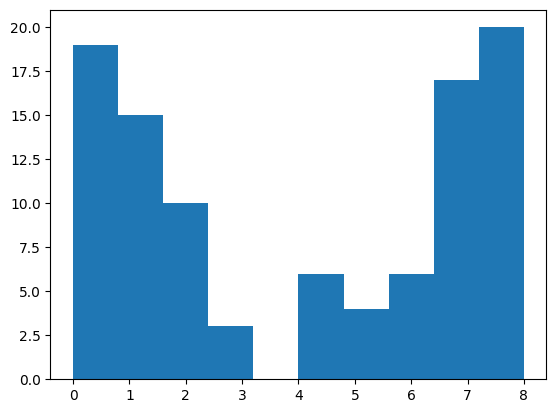

In [ ]:
data_y = np.array(data['y'])
plt.hist(data_y)

In [ ]:
!pip install numpyro

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist

In [ ]:
from numpyro.infer import MCMC, NUTS

def model(data):
  #y~bin(N=8,p=logit(beta + r))
  beta = numpyro.sample('beta', dist.Normal(0, 100))
  s = numpyro.sample('s', dist.Uniform(0, 10000))
  r = numpyro.sample('r', dist.Normal(0, s).expand([len(data_y)]))
  y = numpyro.sample('y', dist.Binomial(total_count=8,logits=(beta + r)), obs=data_y)
  return y

kernel = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(kernel, num_samples=4000, num_warmup=2000)
mcmc.run(jax.random.PRNGKey(0),data_y)

sample: 100%|██████████| 6000/6000 [00:04<00:00, 1408.69it/s, 15 steps of size 2.38e-01. acc. prob=0.91]


In [ ]:
import arviz as ar
ar.summary(mcmc)

Shape validation failed: input_shape: (1, 4000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta,0.082,0.328,-0.510,0.705,0.014,0.010,532.0,840.0,NaN
r[0],-3.839,1.733,-7.106,-0.834,0.029,0.024,4289.0,2473.0,NaN
r[1],-1.243,0.902,-2.909,0.485,0.017,0.014,2911.0,2509.0,NaN
r[2],1.960,1.085,0.115,4.093,0.019,0.015,3554.0,2826.0,NaN
r[3],3.725,1.743,0.927,7.094,0.034,0.028,3501.0,2039.0,NaN
...,...,...,...,...,...,...,...,...,...
r[96],-3.818,1.680,-6.772,-0.727,0.029,0.024,3941.0,2338.0,NaN
r[97],-0.078,0.792,-1.522,1.393,0.017,0.013,2175.0,2663.0,NaN
r[98],1.926,1.067,-0.022,4.005,0.019,0.015,3548.0,1996.0,NaN
r[99],-3.841,1.701,-6.882,-0.844,0.030,0.025,3818.0,1981.0,NaN


In [ ]:
ar.summary(mcmc).loc[['beta', 's']]

Shape validation failed: input_shape: (1, 4000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta,0.082,0.328,-0.510,0.705,0.014,0.010,532.0,840.0,NaN
s,3.016,0.373,2.329,3.713,0.011,0.008,1164.0,1829.0,NaN


In [ ]:
mcmc_samples = mcmc.get_samples()

beta = mcmc_samples['beta']

(array([  10.,  188.,  726., 1139., 1026.,  552.,  252.,   79.,   24.,
           4.]),
 array([1.91459227, 2.18645883, 2.45832539, 2.73019195, 3.00205851,
        3.27392507, 3.54579163, 3.81765819, 4.08952475, 4.36139107,
        4.63325787]),
 <BarContainer object of 10 artists>)

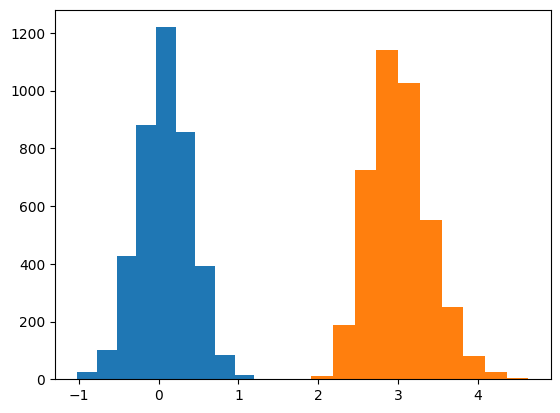

In [ ]:
plt.hist(mcmc_samples['beta'],label='beta')
plt.hist(mcmc_samples['s'],label='s')

In [ ]:
numpyro.render_model(
    model=model,
    model_kwargs={"X": df[["A", "Score"]].values, "y": df["Y"].values},
    render_params=True,
    render_distributions=True
)

TypeError: ignored